In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# As the dataset in not coded in default encodding, so,let's find the encoding format
with open('data/BX-Books.csv') as f:
    print(f)

<_io.TextIOWrapper name='data/BX-Books.csv' mode='r' encoding='cp1252'>


In [3]:
# Reading dataset
books_df = pd.read_csv('data/BX-Books.csv',sep=';',error_bad_lines = False,encoding = 'cp1252')
users_df = pd.read_csv('data/BX-Users.csv',sep=';',error_bad_lines = False,encoding = 'cp1252')
ratings_df = pd.read_csv('data/BX-Book-Ratings.csv',sep=';',error_bad_lines = False,encoding = 'cp1252')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [4]:
# Renaming Columns
books_df.columns = ['ISBN','title','author','year_of_pubs','publisher','imageUrlS','imageUrlM','imageUrlL']
users_df.columns = ['userId','location','age']
ratings_df.columns=['userId','ISBN','book_rating']

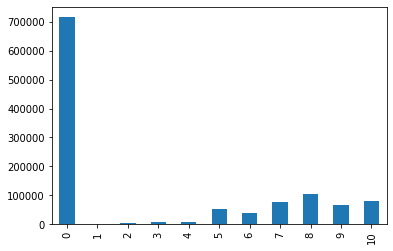

In [5]:
ratings_df['book_rating'].value_counts(sort=False).plot(kind = 'bar')

In [6]:
print(ratings_df.shape,users_df.shape,books_df.shape)
# Shapes aren't equal . So, Analyse the data

(1149780, 3) (278858, 3) (271360, 8)


#### Recommendation Based on Rating Count

In [7]:
high_rated_books = pd.DataFrame(ratings_df.groupby('ISBN')['book_rating'].count().sort_values(ascending=False))
high_rated_books.columns=['rating_count']
high_rated_books.head()

,rating_count
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [8]:
mean_of_books = pd.DataFrame(ratings_df.groupby('ISBN')['book_rating'].mean())
mean_of_books.columns=['mean_rating']
books_mean_rating_count = pd.merge(high_rated_books,mean_of_books,on='ISBN')
books_mean_rating_count.head()
# We can see that books have high rating Count but the average/mean rating is very poor.

,rating_count,mean_rating
ISBN,,
0971880107,2502,1.019584
0316666343,1295,4.468726
0385504209,883,4.652322
0060928336,732,3.448087
0312195516,723,4.334716


#### Users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [9]:
user_count = ratings_df['userId'].value_counts()
ratings_df = ratings_df[ratings_df['userId'].isin(user_count[user_count>=200].index)]
rating_count = ratings_df['book_rating'].value_counts()
ratings_df = ratings_df[ratings_df['book_rating'].isin(rating_count[rating_count>=100].index)]

### Collaborative Filtering Using KNN

In [10]:
combined_book_rating_df = pd.merge(ratings_df,books_df,on='ISBN')
combined_book_rating_df.drop(['author','year_of_pubs','publisher','imageUrlS','imageUrlM','imageUrlL'],inplace=True,axis=1)
combined_book_rating_df.head()

,userId,ISBN,book_rating,title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [11]:
book_rating_count = pd.DataFrame(combined_book_rating_df.groupby('title')['book_rating'].count())
book_rating_count.rename(columns={'book_rating':'rating_count'},inplace=True)
book_rating_count.head()

,rating_count
title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2
Always Have Popsicles,1
Apple Magic (The Collector's series),1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1


In [12]:
rating_plus_combined = pd.merge(combined_book_rating_df,book_rating_count,on='title')
rating_plus_combined.head()

,userId,ISBN,book_rating,title,rating_count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [13]:
# let us consider a thresold value
thresold_value = 50
rating_popular_book = rating_plus_combined.query('rating_count >= @thresold_value')
rating_popular_book.head()

,userId,ISBN,book_rating,title,rating_count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [14]:
rating_popular_book.shape

(62149, 5)

## Filter to users in US and Canada Only

In [18]:
merged_df = pd.merge(rating_popular_book,users_df,on='userId')
merged_df.drop('age',axis=1,inplace=True)
merged_df.head()

,userId,ISBN,book_rating,title,rating_count,location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa"
2,277427,0060934417,0,Bel Canto: A Novel,108,"gilbert, arizona, usa"
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108,"gilbert, arizona, usa"
4,277427,006440188X,0,The Secret Garden,79,"gilbert, arizona, usa"


In [22]:
us_canada_rating = merged_df[merged_df['location'].str.contains('usa|canada')]
us_canada_rating.head()

,userId,ISBN,book_rating,title,rating_count,location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa"
2,277427,0060934417,0,Bel Canto: A Novel,108,"gilbert, arizona, usa"
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108,"gilbert, arizona, usa"
4,277427,006440188X,0,The Secret Garden,79,"gilbert, arizona, usa"


In [25]:
from scipy.sparse import csr_matrix
us_canada_rating = us_canada_rating.drop_duplicates(['userId','title'])
us_canada_rating_ptable = us_canada_rating.pivot(index='title',columns='userId',values='book_rating').fillna(0)
us_canada_rating_ptable.head()

userId,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [26]:
us_canada_rating_matrix = csr_matrix(us_canada_rating_ptable.values)
us_canada_rating_matrix

<746x734 sparse matrix of type '<class 'numpy.float64'>'
	with 13028 stored elements in Compressed Sparse Row format>

In [27]:
# Here the KNN model used is an Unsupervised Model. It is different from the Classification Model.
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(metric='cosine',algorithm='brute')
knn_model.fit(us_canada_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [36]:
fetch_index = 655#np.random.choice(us_canada_rating_ptable.shape[0])
print(fetch_index)
distances, indices = knn_model.kneighbors(us_canada_rating_ptable.iloc[fetch_index,:].values.reshape(1,-1),n_neighbors=6)

655


In [37]:
us_canada_rating_ptable.index[fetch_index]

'The Summerhouse'

In [38]:
for i in range(0,len(distances.flatten())):
    if i == 0:
        print("Recommendation for {}".format(us_canada_rating_ptable.index[fetch_index]))
    else:
        print('{index}:{book}, with distance {distances}'.format(index = i,book = us_canada_rating_ptable.index[indices.flatten()[i]],
                                                                distances = distances.flatten()[i]))

Recommendation for The Summerhouse
1:Miss Julia Speaks Her Mind : A Novel, with distance 0.7319015561178213
2:Dream Country, with distance 0.7388349914155329
3:Unspeakable, with distance 0.7415487922518107
4:The Smoke Jumper, with distance 0.779693788214397
5:Irish Hearts, with distance 0.7833773016226391


In [ ]:
with open(saved_model,'wb') as f:
    print(f)
# This will give you the encoding format,copy the encodinh format and then run the below command:                                                                                                    
with open(saved_model,'rb') as f:
    ml_model = pickle.load()
          